In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('precision', 3)

In [2]:
match_data = pd.read_csv('Dataset Hotel/MatchingHotel.csv', sep=';')
match_data.columns = ['ID Booking', 'Review Count Booking', 'Score Booking', 'MeanScore Booking',
       'StdScore Booking', 'Match', 'City', 'ID Trivago', 'Stars', 'Score Trivago',
       'District', 'Review Count Trivago', 'MeanPrice Trivago', 'StdPrice Trivago', 'MedianPrice Trivago']
match_data

,ID Booking,Review Count Booking,Score Booking,MeanScore Booking,StdScore Booking,Match,City,ID Trivago,Stars,Score Trivago,District,Review Count Trivago,MeanPrice Trivago,StdPrice Trivago,MedianPrice Trivago
0,Hazel Manor_harrogate,139,9.9,9.875,0.331,hazelmanorharrogate,harrogate,Hazel Manor_harrogate,5,9.2,Yorkshire and the Humber,141.0,120.455,4.803,122.0
1,Tavistock House Hotel_tavistock,123,9.9,9.925,0.200,tavistocktavistock,tavistock,Tavistock House Hotel_tavistock,5,9.1,South West England,105.0,110.927,5.242,110.0
2,East House_broadway,103,9.8,9.822,0.583,eastbroadway,broadway,East House_broadway,5,9.4,West Midlands Region,155.0,225.000,NaN,225.0
3,Pheasant Suites_colchester,124,9.7,9.786,0.504,pheasantsuitescolchester,colchester,Pheasant Suites_colchester,5,9.4,East of England,212.0,122.221,9.139,120.0
4,Sentry Mead Hotel_totland,322,9.7,9.744,0.604,sentrymeadtotland,totland,Sentry Mead_totland,5,9.1,South East England,202.0,96.433,5.243,98.0
5,Bath Paradise House_bath,824,9.7,9.692,0.533,bathparadisebath,bath,Bath Paradise House_bath,5,9.5,South West England,1017.0,169.791,14.609,166.0
6,Stoberry House_wells,217,9.8,9.777,0.682,stoberrywells,wells,Stoberry House_wells,5,9.3,South West England,223.0,134.648,24.437,122.0
7,41_london,175,9.7,9.722,0.544,41london,london,Hotel 41_london,5,9.6,Greater London,862.0,431.202,115.242,399.0
8,Wildercombe House_ilfracombe,488,9.7,9.641,0.753,wildercombeilfracombe,ilfracombe,Wildercombe House_ilfracombe,5,9.4,South West England,440.0,75.430,12.898,76.0
9,The Duke of Tavistock_tavistock,152,9.7,9.809,0.497,thedukeoftavistocktavistock,tavistock,The Duke Of Tavistock_tavistock,5,9.1,South West England,141.0,122.688,7.135,125.0


# Esplorazione Dataset

In [3]:
match_data.dtypes

ID Booking               object
Review Count Booking      int64
Score Booking           float64
MeanScore Booking       float64
StdScore Booking        float64
Match                    object
City                     object
ID Trivago               object
Stars                     int64
Score Trivago           float64
District                 object
Review Count Trivago    float64
MeanPrice Trivago       float64
StdPrice Trivago        float64
MedianPrice Trivago     float64
dtype: object

In [4]:
match_data.describe(include='all')

,ID Booking,Review Count Booking,Score Booking,MeanScore Booking,StdScore Booking,Match,City,ID Trivago,Stars,Score Trivago,District,Review Count Trivago,MeanPrice Trivago,StdPrice Trivago,MedianPrice Trivago
count,1237,1237.000,1237.000,1237.000,1237.000,1237,1237,1237,1237.000,1237.000,1237,1237.000,1237.000,1220.000,1237.000
unique,1235,NaN,NaN,NaN,NaN,1235,201,1235,NaN,NaN,9,NaN,NaN,NaN,NaN
top,Central Park Hotel_london,NaN,NaN,NaN,NaN,thebridgelondon,london,The Bridge Hotel_london,NaN,NaN,Greater London,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,2,547,2,NaN,NaN,561,NaN,NaN,NaN,NaN
mean,NaN,968.517,8.098,8.070,1.603,NaN,NaN,NaN,3.294,7.874,NaN,1813.521,126.450,32.224,119.755
std,NaN,870.594,0.853,0.890,0.310,NaN,NaN,NaN,1.012,0.857,NaN,2222.062,83.581,49.928,79.744
min,NaN,10.000,4.700,4.519,0.200,NaN,NaN,NaN,1.000,4.300,NaN,22.000,23.043,0.000,22.000
25%,NaN,373.000,7.600,7.591,1.419,NaN,NaN,NaN,3.000,7.400,NaN,525.000,75.226,10.617,72.000
50%,NaN,713.000,8.300,8.241,1.621,NaN,NaN,NaN,3.000,8.000,NaN,1309.000,101.708,19.456,99.000
75%,NaN,1309.000,8.700,8.679,1.817,NaN,NaN,NaN,4.000,8.500,NaN,2316.000,145.386,34.363,138.000


In [5]:
[match_data[el].value_counts() for el in ['City', 'Stars']]

[london                 547
 blackpool               45
 manchester              41
 bournemouth             33
 birmingham              31
 liverpool               26
 york                    23
 newcastle upon tyne     22
 leeds                   17
 bath                    14
 bristol                 12
 southampton             12
 brighton & hove         11
 nottingham              11
 torquay                 10
 eastbourne              10
 milton keynes            8
 chester                  8
 coventry                 8
 scarborough              7
 sheffield                7
 leicester                6
 heathrow                 6
 harrogate                6
 newquay                  5
 reading                  5
 stratford upon avon      5
 cheltenham               5
 lincoln                  5
 portsmouth               4
                       ... 
 ottery st. mary          1
 totland                  1
 taplow                   1
 arundel                  1
 harrow             

## Missing Value

In [6]:
match_data.isnull().sum()

ID Booking               0
Review Count Booking     0
Score Booking            0
MeanScore Booking        0
StdScore Booking         0
Match                    0
City                     0
ID Trivago               0
Stars                    0
Score Trivago            0
District                 0
Review Count Trivago     0
MeanPrice Trivago        0
StdPrice Trivago        17
MedianPrice Trivago      0
dtype: int64

# Visualizzazioni

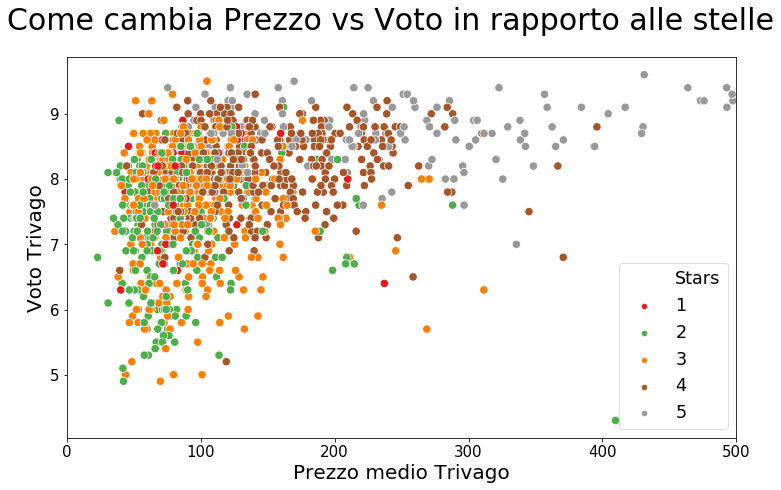

In [7]:
fig, axes = plt.subplots(1, figsize=(12, 7))
sns.set_context('paper', font_scale=2)
scatter_value = sns.scatterplot(y='Score Trivago', x='MeanPrice Trivago', data=match_data, hue='Stars', legend='full',
                                palette='Set1', s=70)
scatter_value.set_ylabel('Voto Trivago', fontsize=20)
scatter_value.set_xlabel('Prezzo medio Trivago', fontsize=20)
plt.suptitle('Come cambia Prezzo vs Voto in rapporto alle stelle', fontsize=30)
axes.set_xlim(0, 500)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(scatter_value)

In [8]:
match_data_describe = match_data.groupby('Stars')[['Score Trivago', 'MeanPrice Trivago']].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
match_data_describe['Score Trivago', 'IQR'] = match_data_describe['Score Trivago']['75%'] - match_data_describe['Score Trivago']['25%']
match_data_describe['MeanPrice Trivago', 'IQR'] = match_data_describe['MeanPrice Trivago']['75%'] - match_data_describe['MeanPrice Trivago']['25%']
match_data_describe['Score Trivago', 'IDR'] = match_data_describe['Score Trivago']['90%'] - match_data_describe['Score Trivago']['10%']
match_data_describe['MeanPrice Trivago', 'IDR'] = match_data_describe['MeanPrice Trivago']['90%'] - match_data_describe['MeanPrice Trivago']['10%']
match_data_describe.sort_index(axis=1, inplace=True)
match_data_describe.transpose()

Stars                          1        2        3        4        5
MeanPrice Trivago 10%     54.543   47.653   54.832   79.701  110.493
                  25%     67.849   60.000   68.109   93.987  147.677
                  50%     81.007   74.031   90.091  128.285  242.674
                  75%    105.892   93.431  110.946  176.290  325.585
                  90%    129.357  116.028  139.874  221.940  444.233
                  IDR     74.813   68.374   85.042  142.239  333.740
                  IQR     38.043   33.431   42.837   82.303  177.908
                  count   34.000  266.000  376.000  424.000  137.000
                  max    237.167  409.795  311.462  560.057  817.319
                  mean    92.977   82.318   95.080  141.307  260.555
                  min     40.273   23.043   35.938   39.545   65.733
                  std     43.113   41.089   37.737   61.049  136.435
Score Trivago     10%      6.760    6.100    6.300    7.400    8.160
                  25%      7.225    6.900    7.100    7.800    8.500
                  50%      8.000    7.600    7.750    8.200    8.800
                  75%      8.475    8.000    8.200    8.600    9.100
                  90%      8.700    8.300    8.600    8.800    9.300
                  IDR      1.940    2.200    2.300    1.400    1.140
                  IQR      1.250    1.100    1.100    0.800    0.600
                  count   34.000  266.000  376.000  424.000  137.000
                  max      8.900    9.100    9.500    9.300    9.600
                  mean     7.859    7.368    7.596    8.157    8.743
                  min      6.300    4.300    4.900    5.200    7.000
                  std      0.754    0.871    0.875    0.569    0.470

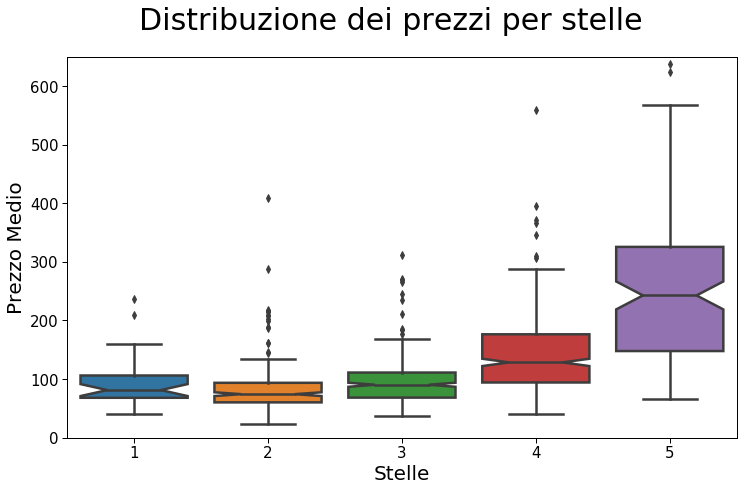

In [9]:
fig, axes = plt.subplots(1, figsize=(12, 7))
sns.set_context('paper', font_scale=2)
box_value = sns.boxplot(y='MeanPrice Trivago', x='Stars', data=match_data, linewidth=2.5, notch=True)
box_value.set_ylabel('Prezzo Medio', fontsize=20)
box_value.set_xlabel('Stelle', fontsize=20)
plt.suptitle('Distribuzione dei prezzi per stelle', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
axes.set_ylim(0, 650)
plt.show(box_value)
fig.savefig('Distribuzione dei prezzi per stelle.png', bbox_inches='tight', dpi=300)

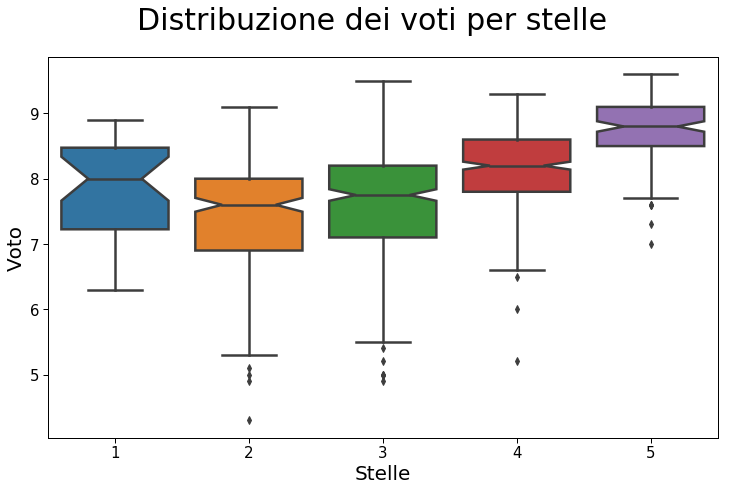

In [10]:
fig, axes = plt.subplots(1, figsize=(12, 7))
sns.set_context('paper', font_scale=2)
box_value = sns.boxplot(y='Score Trivago', x='Stars', data=match_data, linewidth=2.5, notch=True)
box_value.set_ylabel('Voto', fontsize=20)
box_value.set_xlabel('Stelle', fontsize=20)
plt.suptitle('Distribuzione dei voti per stelle', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(box_value)
fig.savefig('Distribuzione dei voti per stelle.png', bbox_inches='tight', dpi=300)